# Guide 1: Random Numbers

## Getting Started

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')

## Task 1: A simple random number generator

### 1.2 Linear Congruential Generator Sequence

In [2]:
x0 = 1
a, c, m = 12, 0, 143

sequence = [x0]
xi = x0
for _ in range(12):
    xi = (a * xi + c) % m
    sequence.append(xi)

print("First 13 numbers:", sequence)

First 13 numbers: [1, 12, 1, 12, 1, 12, 1, 12, 1, 12, 1, 12, 1]


### 1.3 Period of Repetition

*Type your answer here.*

**Observation**: The sequence repeats every 2 elements: 1, 12, 1, 12... 
This small period is due to the specific choice of $a, c, m$. Specifically $12 \times 1 \% 143 = 12$ and $12 \times 12 \% 143 = 1$.

### 1.4 LCG Function

In [3]:
def linCon(xi, a, c, m):
    return (a * xi + c) % m

### 1.5 Randu Generator

In [4]:
a_randu = 65539
c_randu = 0
m_randu = 2**31

# Generate 1000 numbers
x_randu = [1] # Non-zero seed
for _ in range(1000):
    x_randu.append(linCon(x_randu[-1], a_randu, c_randu, m_randu))

# Normalize to [0, 1]
x_randu_norm = np.array(x_randu) / m_randu

### 1.6 Scatter Plot (2D)

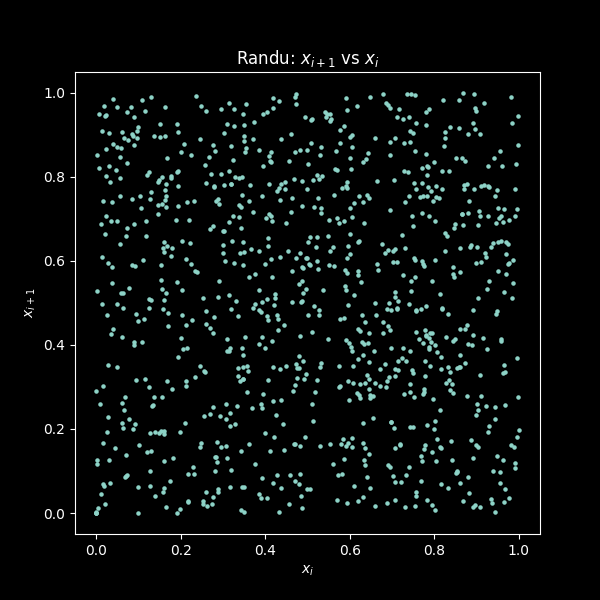

In [5]:
plt.figure(figsize=(6, 6))
plt.scatter(x_randu_norm[:-1], x_randu_norm[1:], s=5)
plt.title("Randu: $x_{i+1}$ vs $x_i$")
plt.xlabel("$x_i$")
plt.ylabel("$x_{i+1}$")
plt.show()

### 1.7 Analysis of 2D Plot

*Answer here*: The points might appear relatively uniform in 2D, or show some slight structure depending on the resolution. However, the "banding" is notoriously obvious in 3D.

### 1.8 & 1.9 3D Scatter Plot (Interactive)

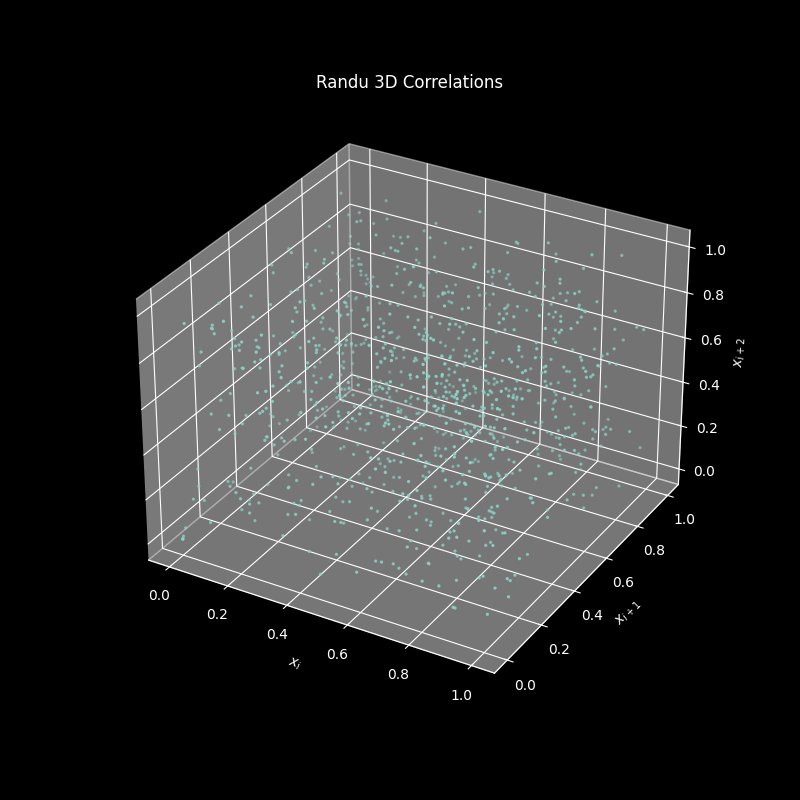

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

# Triplets (xi, xi+1, xi+2)
x_pts = x_randu_norm[:-2]
y_pts = x_randu_norm[1:-1]
z_pts = x_randu_norm[2:]

ax.scatter(x_pts, y_pts, z_pts, s=2)
ax.set_xlabel("$x_i$")
ax.set_ylabel("$x_{i+1}$")
ax.set_zlabel("$x_{i+2}$")
plt.title("Randu 3D Correlations")
plt.show()

### 1.10 3D Observation

*Answer*: When rotated, you should see that the points collapse into a few parallel planes (specifically 15 planes). This indicates strong correlations and makes Randu a very poor generator for simulations.

In [7]:
%matplotlib inline

## Task 2: Generating uniform random numbers and timing calculations

### 2.1 Timing Loop vs Array

In [8]:
from timeit import default_timer as timer

# 2.1 Timing a loop
start = timer()
random_list = []
for _ in range(10000):
    random_list.append(np.random.random())
end = timer()
loop_time = end - start
print(f"Loop time: {loop_time:.6f} s")

# 2.2 Timing array generation
start = timer()
random_array = np.random.random(10000)
end = timer()
array_time = end - start
print(f"Array time: {array_time:.6f} s")

# 2.3 Factor
print(f"Speedup factor: {loop_time / array_time:.2f}x")

Loop time: 0.718134 s
Array time: 0.000324 s
Speedup factor: 2219.89x


### 2.4 & 2.5 Histogramming

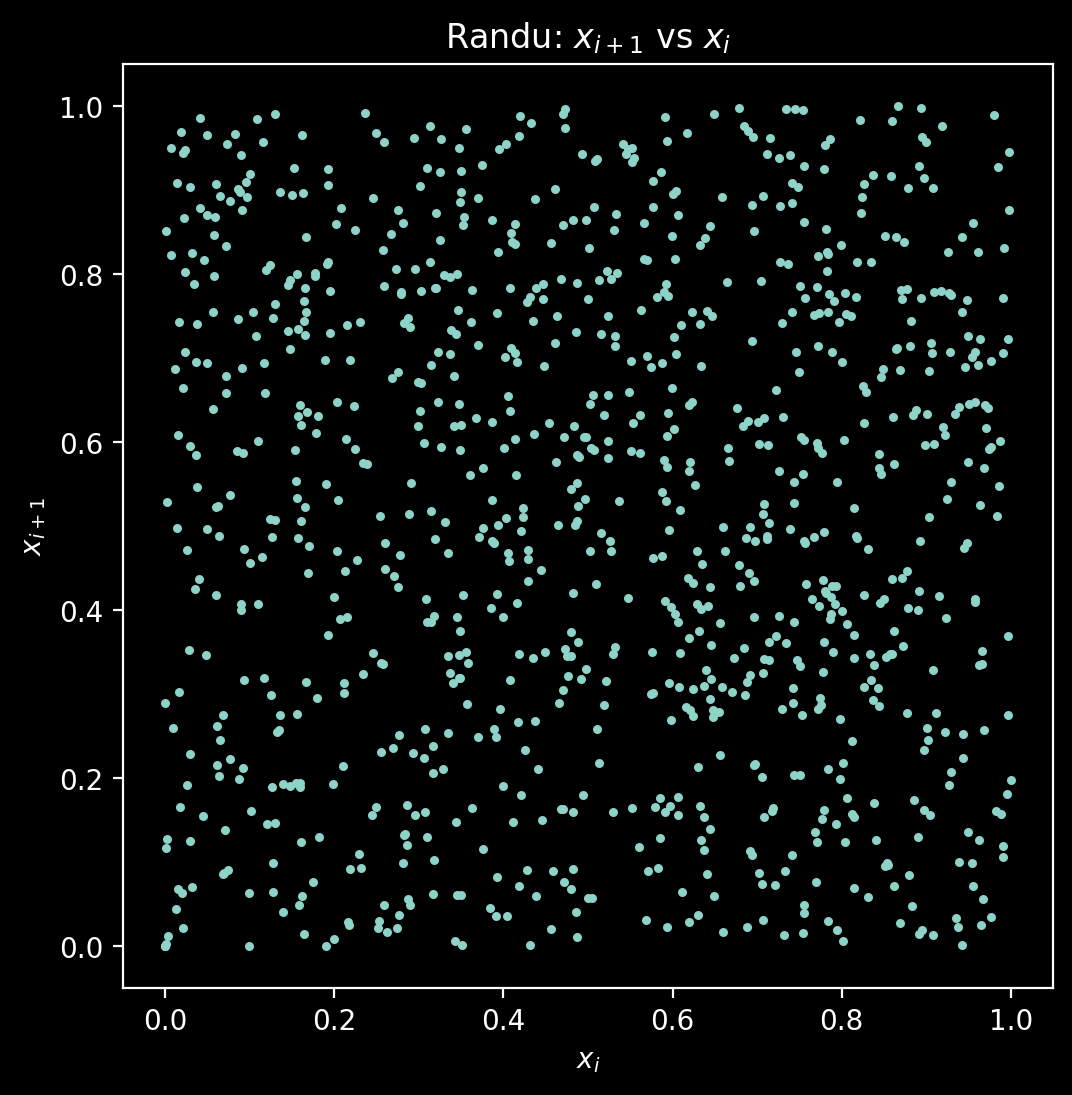

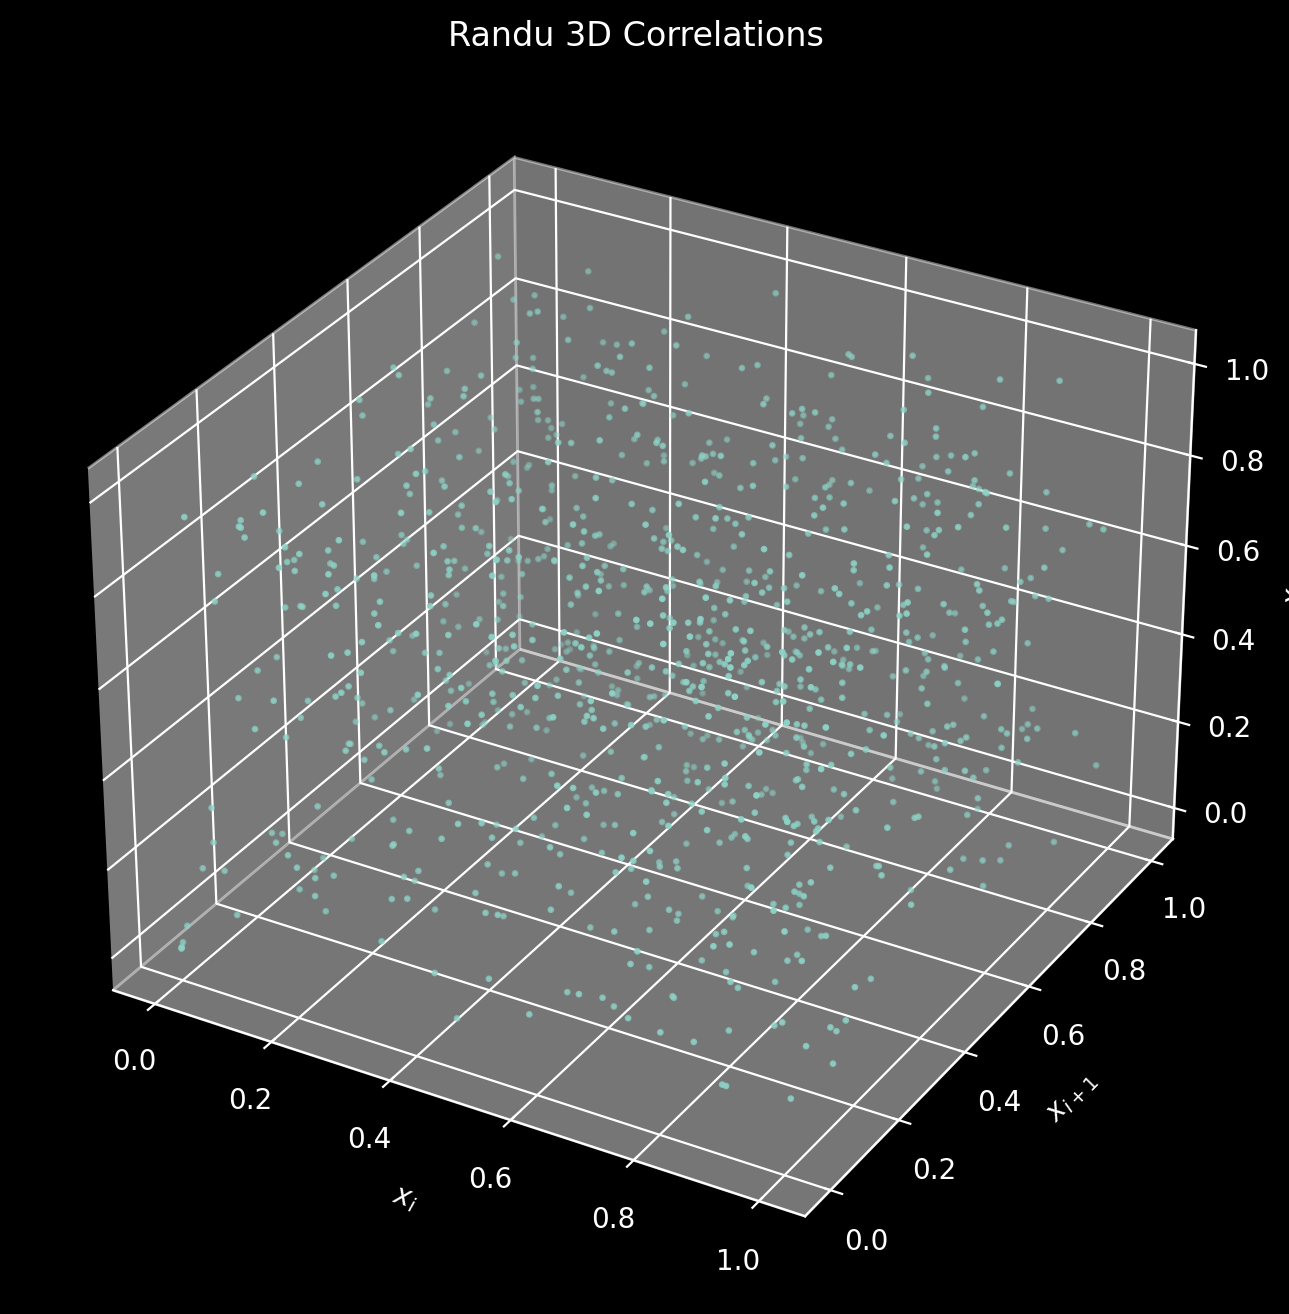

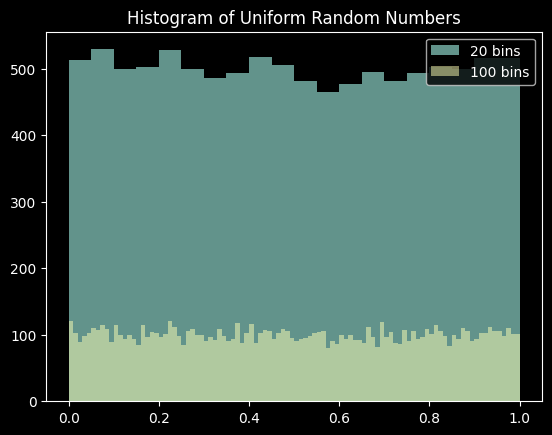

In [9]:
plt.figure()
plt.hist(random_array, bins=20, alpha=0.7, label="20 bins")
plt.hist(random_array, bins=100, alpha=0.5, label="100 bins")
plt.title("Histogram of Uniform Random Numbers")
plt.legend()
plt.show()

### 2.6 Optimal Binning

*Answer*: For relative fluctuations $\le 5\%$, we need $1/\sqrt{N_{bin}} \le 0.05$, so $N_{bin} \ge 400$ counts per bin. With 10,000 total points, max bins $\approx 10000/400 = 25$ bins.

## Task 3: Probability Distributions and Histogramming

### 3.1 Decay Probability Derivation

Let $P_{not\ yet}(t)$ be probability of survival up to $t$.

$P_{not\ yet}(t+\Delta t) = P_{not\ yet}(t) \times (1 - r\Delta t)$

$(P(t+\Delta t) - P(t))/\Delta t \approx -r P(t) \implies \frac{dP}{dt} = -r P(t)$

Solution: $P_{not\ yet}(t) = e^{-rt}$

Probability density for decaying at $t$: $p_{now}(t) = -\frac{d}{dt} P_{not\ yet}(t) = r e^{-rt}$

### 3.2 Decay Simulation

In [10]:
r = 1.0
dt = 0.01  # r*dt = 0.01 < 1

decay_times = []
start = timer()
for _ in range(10000):
    t = 0
    while True:
        if np.random.random() < r * dt:
            decay_times.append(t)
            break
        t += dt
end = timer()
print(f"Simulation time: {end - start:.4f} s")

Simulation time: 0.7155 s


### 3.3 Histogram vs Analytic

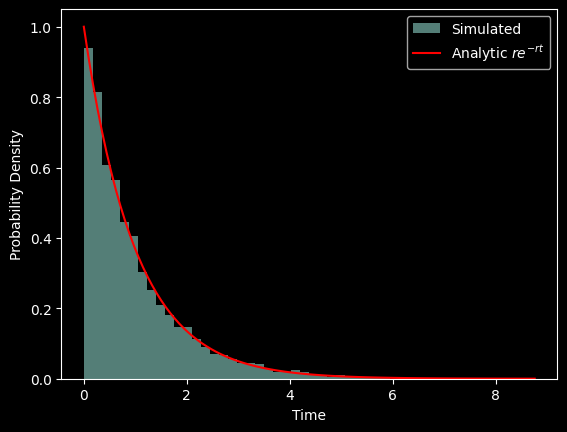

In [11]:
plt.figure()
# density=True for normalized probability density
plt.hist(decay_times, bins=50, density=True, alpha=0.6, label="Simulated")

t_vals = np.linspace(0, max(decay_times), 100)
p_analytic = r * np.exp(-r * t_vals)
plt.plot(t_vals, p_analytic, 'r-', label="Analytic $re^{-rt}$")
plt.xlabel("Time")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

### 3.5 Numpy Exponential

Numpy time: 0.0132 s


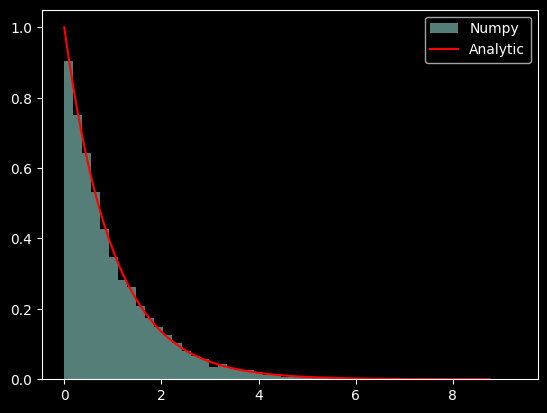

In [12]:
start = timer()
np_decay_times = np.random.exponential(scale=1/r, size=10000)
end = timer()
print(f"Numpy time: {end - start:.4f} s")

plt.figure()
plt.hist(np_decay_times, bins=50, density=True, alpha=0.6, label="Numpy")
plt.plot(t_vals, p_analytic, 'r-', label="Analytic")
plt.legend()
plt.show()

### 3.7 - 3.12 Poisson Distribution

Mean: 10.16 (Expected 10.0)
Var: 10.23 (Expected 10.0)


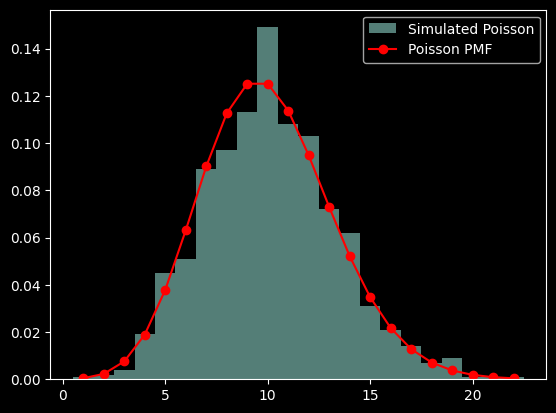

In [13]:
import scipy.stats as stats

T = 10
mu = r * T

# 3.9 Generate 1000 samples
poisson_samples = stats.poisson.rvs(mu, size=1000)

plt.figure()
# Discrete distribution, so bins should be integers
bins = np.arange(min(poisson_samples), max(poisson_samples) + 2) - 0.5
plt.hist(poisson_samples, bins=bins, density=True, alpha=0.6, label="Simulated Poisson")

# 3.10 Mean and Variance
print(f"Mean: {np.mean(poisson_samples):.2f} (Expected {mu})")
print(f"Var: {np.var(poisson_samples):.2f} (Expected {mu})")

# 3.11 Analytic PMF
k_vals = np.arange(min(poisson_samples), max(poisson_samples) + 1)
pmf_vals = stats.poisson.pmf(k_vals, mu)
plt.plot(k_vals, pmf_vals, 'ro-', label="Poisson PMF")
plt.legend()
plt.show()

### 3.12 Poisson Shape with increasing $\mu$

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ahila\AppData\Local\Temp\ipykernel_26048\3110468996.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, stats.poisson.pmf(x, m), 'o-', label=f"$\mu={m}$")


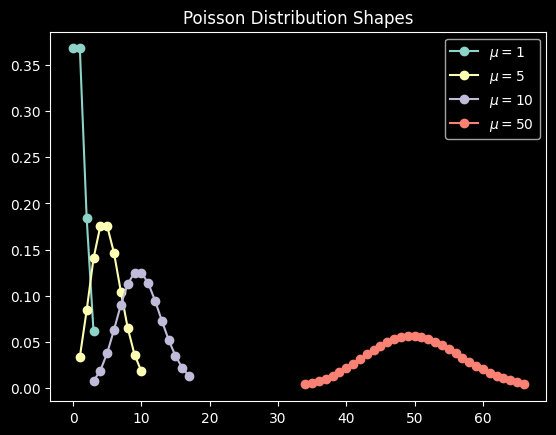

In [14]:
plt.figure()
mu_list = [1, 5, 10, 50]
for m in mu_list:
    x = np.arange(stats.poisson.ppf(0.01, m), stats.poisson.ppf(0.99, m))
    plt.plot(x, stats.poisson.pmf(x, m), 'o-', label=f"$\mu={m}$")
plt.legend()
plt.title("Poisson Distribution Shapes")
plt.show()

## Task 4: Random Walks

### 4.1 1D Random Walk Simulation

In [ ]:
def simulate_walks(N, num_walks=10000):
    # Steps: -1 or +1. 50/50 chance.
    # Using np.random.choice to generate all steps at once
    steps = np.random.choice([-1, 1], size=(num_walks, N))
    # End-to-end displacement is sum of steps
    displacements = np.sum(steps, axis=1)
    return displacements

N_list = [10, 20, 30, 40, 50]
results = {}
for N in N_list:
    results[N] = simulate_walks(N)
    
# 4.2 Mean Displacement
mean_disp = [np.mean(results[N]) for N in N_list]
print("Mean displacements:", mean_disp)

NameError: name 'np' is not defined

### 4.3 Mean Displacement Observation

*Answer*: The mean displacement is approximately 0 (within noise), which is expected for a symmetric random walk.

### 4.4 Mean Squared Displacement (MSD)

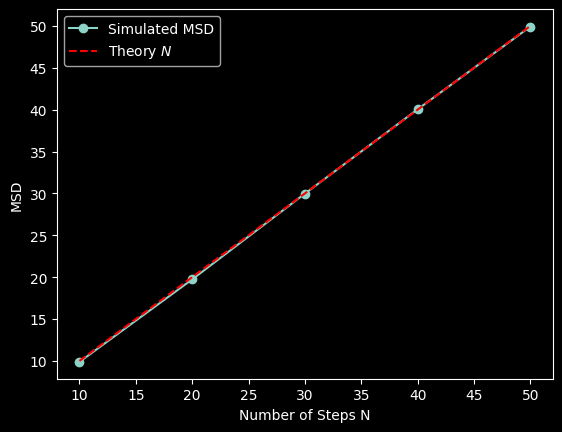

In [16]:
msd = [np.mean(results[N]**2) for N in N_list]

plt.figure()
plt.plot(N_list, msd, 'o-', label="Simulated MSD")
plt.plot(N_list, N_list, 'r--', label="Theory $N$") # MSD ~ N
plt.xlabel("Number of Steps N")
plt.ylabel("MSD")
plt.legend()
plt.show()

### 4.5 Deviation Math

a) because each step has $dx_i = \pm a$, as N gets larger it must go to zero. We take almost equal number of steps left and right

$\sum_{i=1}^{N} \langle dx_i \rangle = 0 = \langle r(N) \rangle $ 

b) Since steps are uncorrelated, ie one does not affect the other, 


$$\langle r(N)^2 \rangle = \sum_{i=1}^{N} \langle dx_i^2 \rangle + \sum_{i \ne j} \langle dx_i dx_j \rangle$$


Using,
1. $\langle dx_i \cdot dx_j \rangle = \langle dx_i \rangle \langle dx_j \rangle = 0 $ 

1. since $(\pm 1)^2 = 1$, we can say $\langle dx_i^2 \rangle = 1$

$$\langle r(N)^2 \rangle = \sum_{i=1}^{N} 1 + \sum_{i \ne j} \langle dx_i dx_j \rangle$$



Thus $$\langle r(N)^2 \rangle = N \cdot 1 + 0$$

**Finally,** $$\langle r(N)^2 \rangle = N$$

### 4.6 & 4.7 Histograms vs Gaussian

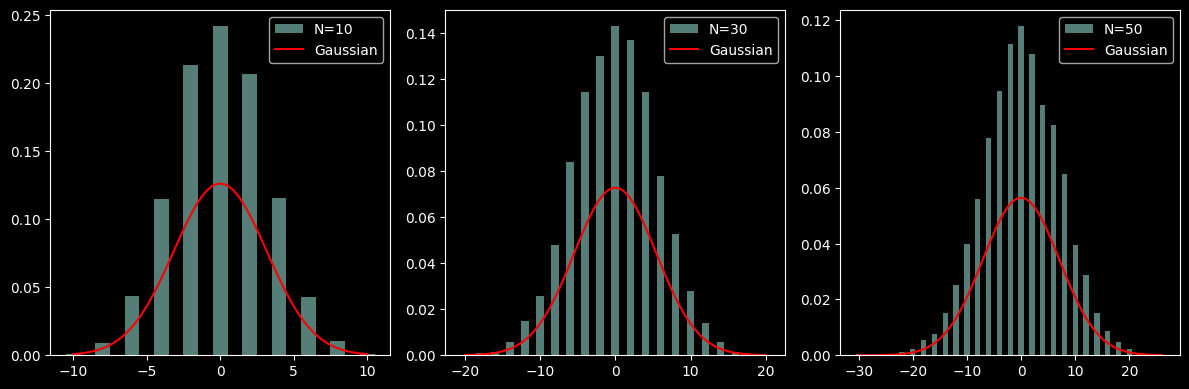

In [17]:
plt.figure(figsize=(12, 4))
N_plot = [10, 30, 50]

for i, N in enumerate(N_plot):
    plt.subplot(1, 3, i+1)
    data = results[N]
    
    # Gaussian parameters
    mu = 0
    sigma = np.sqrt(N) # Since <r^2> = N, var = N
    
    # Histogram
    # Binning: ensure bins cover the range. Steps are integers, displacements differ by 2
    bins = np.arange(min(data), max(data) + 2) - 0.5
    plt.hist(data, bins=bins, density=True, alpha=0.6, label=f"N={N}")
    
    # Gaussian
    x = np.linspace(min(data), max(data), 100)
    gauss = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, gauss, 'r-', label="Gaussian")
    
    plt.legend()

plt.tight_layout()
plt.show()

### 4.8 2D Random Walk

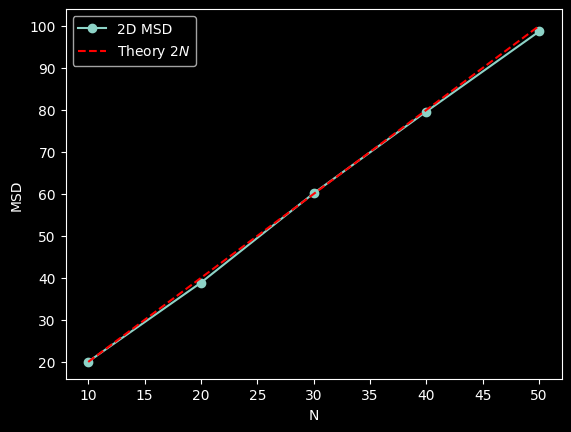

In [18]:
def simulate_2d_walks(N, num_walks=10000):
    # X steps and Y steps are independent 1D walks
    x_disp = simulate_walks(N, num_walks)
    y_disp = simulate_walks(N, num_walks)
    r2 = x_disp**2 + y_disp**2
    return r2

msd_2d = []
for N in N_list:
    r2 = simulate_2d_walks(N)
    msd_2d.append(np.mean(r2))

plt.figure()
plt.plot(N_list, msd_2d, 'o-', label="2D MSD")
plt.plot(N_list, [2*n for n in N_list], 'r--', label="Theory $2N$")
plt.xlabel("N")
plt.ylabel("MSD")
plt.legend()
plt.show()

### 2D Observation

The MSD for 2D is approximately $2N$, because $\langle R^2 \rangle = \langle X^2 \rangle + \langle Y^2 \rangle = N + N = 2N$.

## Task 5: Wrap up

### 5.1 Confusing Questions

*Type your feedback here.*

### 5.2 General Feedback

*Type your feedback here.*